### Statistical Inference Confidence Interval

This notebook demostrates the concept of confidence interval (CI) of an estimate. We will examine the coverage probability of CI.


Consider a senario: FSU has **20,000** students, their IQ level follows a normal distribution with mean of **110**, and standard deviation of **10**. Let's draw samples from the student population and examine the relationship between sample and population.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate population data

(array([   9.,   94.,  665., 2776., 5603., 6147., 3474., 1050.,  165.,
          17.]),
 array([ 67.56056031,  75.82962808,  84.09869586,  92.36776363,
        100.63683141, 108.90589918, 117.17496696, 125.44403473,
        133.7131025 , 141.98217028, 150.25123805]),
 <BarContainer object of 10 artists>)

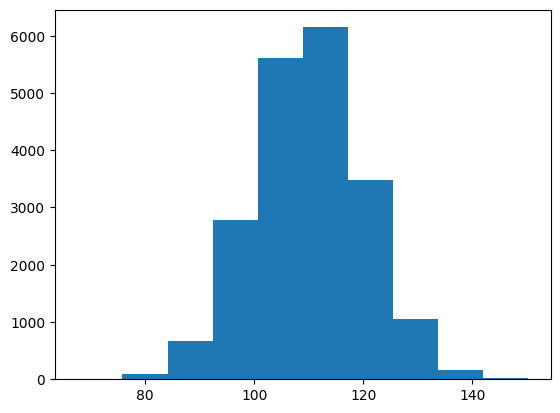

In [2]:
N = 20000 #20,000 students

#Generate from a normal distribution
data = np.random.randn(N)*10 + 110

plt.hist(data)

In [3]:
print("Population mean is:", np.mean(data))
print("Population variance is:", np.var(data))

Population mean is: 109.96003293127634
Population variance is: 100.58281673887748



### Now lets draw samples. Let's start with a sample size of 10 students

In [4]:
#One sample with 10 numbers

sample_10 = np.random.choice(data, 10)

sample_10

array([120.63233783, 112.41023304, 112.34779699,  89.86532222,
       109.13672046,  96.75808561, 101.81824389, 106.8005505 ,
       116.99928418, 114.11411914])

In [5]:
print("The sample mean is: ", np.mean(sample_10))

The sample mean is:  108.08826938598274


### How about if we repeat the sampling process, say 1,000 times

Get the critical t value from the t-distribution. Degree of freedom: 10-1 (sample size - 1). Confidence interval width: 95%.

In [6]:
from scipy import stats
t = stats.t.ppf(1-0.05/2, 9)
print(t)

2.262157162740991


In [7]:
coverage_list = []

for i in range(1000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    err_of_margin = t*np.std(sample)/np.sqrt(10)
    
    CI_lower = sample_mean - err_of_margin
    CI_upper = sample_mean + err_of_margin
    
    true_mean = np.mean(data)
    
    is_covered = (true_mean>=CI_lower) and (true_mean<=CI_upper)
    
    print(i," 95% confidence interval ", sample_mean, "Cover the true mean?", is_covered)
    
    coverage_list.append(is_covered)

0  95% confidence interval  113.19799628648923 Cover the true mean? True
1  95% confidence interval  112.71216390713812 Cover the true mean? True
2  95% confidence interval  105.6885080748975 Cover the true mean? True
3  95% confidence interval  109.58696645433504 Cover the true mean? True
4  95% confidence interval  109.41181782962731 Cover the true mean? True
5  95% confidence interval  110.84305791506604 Cover the true mean? True
6  95% confidence interval  112.41018885785613 Cover the true mean? True
7  95% confidence interval  112.22373591212894 Cover the true mean? True
8  95% confidence interval  111.25253769339145 Cover the true mean? True
9  95% confidence interval  114.94362465247268 Cover the true mean? False
10  95% confidence interval  110.31609579760655 Cover the true mean? True
11  95% confidence interval  111.3061465585317 Cover the true mean? True
12  95% confidence interval  110.46173987116643 Cover the true mean? True
13  95% confidence interval  112.32812372239107 C

We observe that sometimes that the CI covers the mean, and sometimes not. So what is the true coverage probability?

In [8]:
np.sum(coverage_list)/len(coverage_list)*100

92.5

It is 93.4% from the above example, fairly close to 95%. 

Similarly to when we examine the sample mean bias, the coverage % will be closer to 95% accurate if we do more samplings (10,000 -> 1,000,000)

In [9]:
coverage_list = []

for i in range(100000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    err_of_margin = t*np.std(sample)/np.sqrt(10)
    
    CI_lower = sample_mean - err_of_margin
    CI_upper = sample_mean + err_of_margin
    
    true_mean = np.mean(data)
    
    is_covered = (true_mean>=CI_lower) and (true_mean<=CI_upper)
    
    print(i," 95% confidence interval ", sample_mean, "Cover the true mean?", is_covered)
    
    coverage_list.append(is_covered)

0  95% confidence interval  103.9087713868245 Cover the true mean? False
1  95% confidence interval  112.07127862759435 Cover the true mean? True
2  95% confidence interval  106.85144249455807 Cover the true mean? True
3  95% confidence interval  109.97349620862545 Cover the true mean? True
4  95% confidence interval  110.74361873454545 Cover the true mean? True
5  95% confidence interval  111.96218098348274 Cover the true mean? True
6  95% confidence interval  107.5940139331464 Cover the true mean? True
7  95% confidence interval  115.72086926561697 Cover the true mean? False
8  95% confidence interval  107.83337935501473 Cover the true mean? True
9  95% confidence interval  111.16005967660233 Cover the true mean? True
10  95% confidence interval  110.46466236666933 Cover the true mean? True
11  95% confidence interval  110.86501702832501 Cover the true mean? True
12  95% confidence interval  112.79600786513133 Cover the true mean? True
13  95% confidence interval  105.87151517956968 

2741  95% confidence interval  112.34934822966875 Cover the true mean? True
2742  95% confidence interval  108.83008663470355 Cover the true mean? True
2743  95% confidence interval  104.32288720463907 Cover the true mean? False
2744  95% confidence interval  106.71350684971773 Cover the true mean? True
2745  95% confidence interval  104.93562765336344 Cover the true mean? True
2746  95% confidence interval  111.38716973579679 Cover the true mean? True
2747  95% confidence interval  105.29560417320188 Cover the true mean? True
2748  95% confidence interval  113.37744727001564 Cover the true mean? True
2749  95% confidence interval  111.89005692978272 Cover the true mean? True
2750  95% confidence interval  113.2785928958605 Cover the true mean? True
2751  95% confidence interval  110.13445714187785 Cover the true mean? True
2752  95% confidence interval  108.85846957424872 Cover the true mean? True
2753  95% confidence interval  110.39398448025295 Cover the true mean? True
2754  95% co

3328  95% confidence interval  108.52830967286987 Cover the true mean? True
3329  95% confidence interval  105.1558783826545 Cover the true mean? True
3330  95% confidence interval  106.36839587849784 Cover the true mean? True
3331  95% confidence interval  110.07496376311455 Cover the true mean? True
3332  95% confidence interval  117.21492328636955 Cover the true mean? True
3333  95% confidence interval  117.01279032521339 Cover the true mean? True
3334  95% confidence interval  114.21443383071016 Cover the true mean? False
3335  95% confidence interval  108.29488913058545 Cover the true mean? True
3336  95% confidence interval  106.81052292473942 Cover the true mean? True
3337  95% confidence interval  115.36990003293772 Cover the true mean? True
3338  95% confidence interval  110.9248802764666 Cover the true mean? True
3339  95% confidence interval  114.44022524323671 Cover the true mean? False
3340  95% confidence interval  115.5000343886937 Cover the true mean? False
3341  95% co

5317  95% confidence interval  103.57447836582028 Cover the true mean? True
5318  95% confidence interval  115.4225920758129 Cover the true mean? True
5319  95% confidence interval  109.69045608984143 Cover the true mean? True
5320  95% confidence interval  112.58039813997115 Cover the true mean? True
5321  95% confidence interval  107.33644293858427 Cover the true mean? True
5322  95% confidence interval  112.10121648970149 Cover the true mean? True
5323  95% confidence interval  107.59699197837499 Cover the true mean? True
5324  95% confidence interval  110.4866347912658 Cover the true mean? True
5325  95% confidence interval  108.83746614341503 Cover the true mean? True
5326  95% confidence interval  107.8557031141606 Cover the true mean? True
5327  95% confidence interval  106.80311018868997 Cover the true mean? True
5328  95% confidence interval  111.86229795958596 Cover the true mean? True
5329  95% confidence interval  103.21933228849366 Cover the true mean? False
5330  95% conf

6033  95% confidence interval  106.57239431662939 Cover the true mean? True
6034  95% confidence interval  105.41103305177303 Cover the true mean? True
6035  95% confidence interval  111.21049199248753 Cover the true mean? True
6036  95% confidence interval  111.05790542566012 Cover the true mean? True
6037  95% confidence interval  111.88695425250421 Cover the true mean? True
6038  95% confidence interval  118.2262756691243 Cover the true mean? True
6039  95% confidence interval  108.70742481328713 Cover the true mean? True
6040  95% confidence interval  103.5059170598258 Cover the true mean? False
6041  95% confidence interval  107.18455573590532 Cover the true mean? True
6042  95% confidence interval  112.42067026106308 Cover the true mean? True
6043  95% confidence interval  111.92083017424042 Cover the true mean? True
6044  95% confidence interval  111.10349578648663 Cover the true mean? True
6045  95% confidence interval  114.64634098889708 Cover the true mean? True
6046  95% con

8695  95% confidence interval  103.61372315742003 Cover the true mean? False
8696  95% confidence interval  111.43598079213605 Cover the true mean? True
8697  95% confidence interval  106.46287846164648 Cover the true mean? True
8698  95% confidence interval  110.47474950694513 Cover the true mean? True
8699  95% confidence interval  104.00974057707772 Cover the true mean? True
8700  95% confidence interval  113.48689442261153 Cover the true mean? True
8701  95% confidence interval  113.86692929570131 Cover the true mean? True
8702  95% confidence interval  109.87110727531088 Cover the true mean? True
8703  95% confidence interval  114.56789950315974 Cover the true mean? False
8704  95% confidence interval  115.26142409943398 Cover the true mean? False
8705  95% confidence interval  109.10966284697349 Cover the true mean? True
8706  95% confidence interval  108.6530652709218 Cover the true mean? True
8707  95% confidence interval  112.37337823075593 Cover the true mean? True
8708  95% 

9510  95% confidence interval  107.01150034093487 Cover the true mean? True
9511  95% confidence interval  107.72152055943067 Cover the true mean? True
9512  95% confidence interval  108.74401705623022 Cover the true mean? True
9513  95% confidence interval  103.81377706867207 Cover the true mean? True
9514  95% confidence interval  109.87340205070885 Cover the true mean? True
9515  95% confidence interval  109.56114578480637 Cover the true mean? True
9516  95% confidence interval  107.64488263722583 Cover the true mean? True
9517  95% confidence interval  114.59030135111391 Cover the true mean? True
9518  95% confidence interval  110.54251891292333 Cover the true mean? True
9519  95% confidence interval  115.49235507639219 Cover the true mean? True
9520  95% confidence interval  113.34741502003979 Cover the true mean? True
9521  95% confidence interval  108.73975965788286 Cover the true mean? True
9522  95% confidence interval  112.25453990663792 Cover the true mean? True
9523  95% co

11589  95% confidence interval  115.96458522268479 Cover the true mean? True
11590  95% confidence interval  106.54391954597614 Cover the true mean? True
11591  95% confidence interval  112.02178546129392 Cover the true mean? True
11592  95% confidence interval  118.48381845454294 Cover the true mean? True
11593  95% confidence interval  112.05481522773997 Cover the true mean? True
11594  95% confidence interval  112.42423884749442 Cover the true mean? True
11595  95% confidence interval  104.93424410582074 Cover the true mean? True
11596  95% confidence interval  116.87059332011916 Cover the true mean? True
11597  95% confidence interval  112.33566273790873 Cover the true mean? True
11598  95% confidence interval  109.04294208517005 Cover the true mean? True
11599  95% confidence interval  113.6873195742415 Cover the true mean? True
11600  95% confidence interval  110.83987495746938 Cover the true mean? True
11601  95% confidence interval  110.82899618839534 Cover the true mean? True


12568  95% confidence interval  110.37158643612133 Cover the true mean? True
12569  95% confidence interval  106.53170522625366 Cover the true mean? True
12570  95% confidence interval  108.45784816808452 Cover the true mean? True
12571  95% confidence interval  110.57486290916809 Cover the true mean? True
12572  95% confidence interval  111.17574476158146 Cover the true mean? True
12573  95% confidence interval  109.34797403710975 Cover the true mean? True
12574  95% confidence interval  105.06299347546258 Cover the true mean? True
12575  95% confidence interval  110.13646752487014 Cover the true mean? True
12576  95% confidence interval  104.74948205538733 Cover the true mean? False
12577  95% confidence interval  110.9251235475123 Cover the true mean? True
12578  95% confidence interval  106.93916577387824 Cover the true mean? True
12579  95% confidence interval  107.44557698341805 Cover the true mean? True
12580  95% confidence interval  109.90175628228671 Cover the true mean? True

15257  95% confidence interval  113.16585595836443 Cover the true mean? True
15258  95% confidence interval  111.09804107759189 Cover the true mean? True
15259  95% confidence interval  107.21809697006856 Cover the true mean? True
15260  95% confidence interval  110.70861367637242 Cover the true mean? True
15261  95% confidence interval  109.00421685519014 Cover the true mean? True
15262  95% confidence interval  109.40603157816292 Cover the true mean? True
15263  95% confidence interval  110.9692312670604 Cover the true mean? True
15264  95% confidence interval  109.07149742078079 Cover the true mean? True
15265  95% confidence interval  111.15290501687616 Cover the true mean? True
15266  95% confidence interval  116.5504668896925 Cover the true mean? True
15267  95% confidence interval  112.96607218216141 Cover the true mean? True
15268  95% confidence interval  107.26003255421624 Cover the true mean? True
15269  95% confidence interval  105.51973149035123 Cover the true mean? True
1

15923  95% confidence interval  112.73653878219811 Cover the true mean? True
15924  95% confidence interval  104.15935095540628 Cover the true mean? False
15925  95% confidence interval  109.15007060348546 Cover the true mean? True
15926  95% confidence interval  118.44143724819187 Cover the true mean? False
15927  95% confidence interval  111.64127315649318 Cover the true mean? True
15928  95% confidence interval  109.26619228970598 Cover the true mean? True
15929  95% confidence interval  110.60234259338968 Cover the true mean? True
15930  95% confidence interval  112.55200727845912 Cover the true mean? True
15931  95% confidence interval  108.88358046793533 Cover the true mean? True
15932  95% confidence interval  111.3504203020598 Cover the true mean? True
15933  95% confidence interval  106.78612120496882 Cover the true mean? True
15934  95% confidence interval  108.16266293200415 Cover the true mean? True
15935  95% confidence interval  115.35550243751916 Cover the true mean? Tru

18638  95% confidence interval  105.75474222675268 Cover the true mean? True
18639  95% confidence interval  109.51066389251405 Cover the true mean? True
18640  95% confidence interval  107.57660194602371 Cover the true mean? True
18641  95% confidence interval  105.65864785178204 Cover the true mean? True
18642  95% confidence interval  114.47728774532011 Cover the true mean? True
18643  95% confidence interval  110.53800977962499 Cover the true mean? True
18644  95% confidence interval  109.80549544606518 Cover the true mean? True
18645  95% confidence interval  110.58947280044318 Cover the true mean? True
18646  95% confidence interval  111.386403830651 Cover the true mean? True
18647  95% confidence interval  109.49291521925345 Cover the true mean? True
18648  95% confidence interval  113.89351275799547 Cover the true mean? True
18649  95% confidence interval  104.51904645326536 Cover the true mean? True
18650  95% confidence interval  114.38680955776199 Cover the true mean? True
1

19565  95% confidence interval  113.71076077927151 Cover the true mean? True
19566  95% confidence interval  109.0119976868381 Cover the true mean? True
19567  95% confidence interval  109.97582356388762 Cover the true mean? True
19568  95% confidence interval  108.30974135661238 Cover the true mean? True
19569  95% confidence interval  109.62472528278485 Cover the true mean? True
19570  95% confidence interval  109.41249153150656 Cover the true mean? True
19571  95% confidence interval  111.09851628238141 Cover the true mean? True
19572  95% confidence interval  114.71630356495136 Cover the true mean? True
19573  95% confidence interval  118.59916679108896 Cover the true mean? False
19574  95% confidence interval  105.81552247088739 Cover the true mean? True
19575  95% confidence interval  109.0764044765021 Cover the true mean? True
19576  95% confidence interval  111.67069755790935 Cover the true mean? True
19577  95% confidence interval  111.57572248190479 Cover the true mean? True


23516  95% confidence interval  103.47630652541463 Cover the true mean? True
23517  95% confidence interval  107.94093167858477 Cover the true mean? True
23518  95% confidence interval  111.054818194056 Cover the true mean? True
23519  95% confidence interval  110.47242835441004 Cover the true mean? True
23520  95% confidence interval  115.00882083344156 Cover the true mean? True
23521  95% confidence interval  110.20093287524985 Cover the true mean? True
23522  95% confidence interval  107.88190410794543 Cover the true mean? True
23523  95% confidence interval  108.76619153069859 Cover the true mean? True
23524  95% confidence interval  113.10948284532321 Cover the true mean? True
23525  95% confidence interval  110.6466982330915 Cover the true mean? True
23526  95% confidence interval  107.18488290281974 Cover the true mean? True
23527  95% confidence interval  105.86656866132027 Cover the true mean? True
23528  95% confidence interval  109.33165798025468 Cover the true mean? True
23

24410  95% confidence interval  112.4060443686238 Cover the true mean? True
24411  95% confidence interval  110.17109841886403 Cover the true mean? True
24412  95% confidence interval  105.35817054425186 Cover the true mean? True
24413  95% confidence interval  112.31819359452147 Cover the true mean? True
24414  95% confidence interval  111.81815423666633 Cover the true mean? True
24415  95% confidence interval  111.19790465269709 Cover the true mean? True
24416  95% confidence interval  109.67439810166107 Cover the true mean? True
24417  95% confidence interval  109.05046729314013 Cover the true mean? True
24418  95% confidence interval  112.41347772736444 Cover the true mean? True
24419  95% confidence interval  110.05013338727449 Cover the true mean? True
24420  95% confidence interval  110.55565881420894 Cover the true mean? True
24421  95% confidence interval  106.6194920618988 Cover the true mean? True
24422  95% confidence interval  112.03929301079877 Cover the true mean? True
2

27692  95% confidence interval  110.55864479806364 Cover the true mean? True
27693  95% confidence interval  113.99799898961487 Cover the true mean? True
27694  95% confidence interval  110.15762297328106 Cover the true mean? True
27695  95% confidence interval  112.83305779944178 Cover the true mean? True
27696  95% confidence interval  109.95078900296144 Cover the true mean? True
27697  95% confidence interval  113.20800236567773 Cover the true mean? True
27698  95% confidence interval  105.50235739158447 Cover the true mean? True
27699  95% confidence interval  105.1562352767806 Cover the true mean? True
27700  95% confidence interval  114.22367348505232 Cover the true mean? True
27701  95% confidence interval  115.6816663949187 Cover the true mean? True
27702  95% confidence interval  111.57836965496958 Cover the true mean? True
27703  95% confidence interval  108.71869718231146 Cover the true mean? True
27704  95% confidence interval  107.25539008476771 Cover the true mean? True
2

28677  95% confidence interval  116.78986985732077 Cover the true mean? True
28678  95% confidence interval  109.68212286570349 Cover the true mean? True
28679  95% confidence interval  110.30916464408465 Cover the true mean? True
28680  95% confidence interval  105.10045669603423 Cover the true mean? True
28681  95% confidence interval  109.15367947607317 Cover the true mean? True
28682  95% confidence interval  105.38933633570802 Cover the true mean? True
28683  95% confidence interval  109.80177076622893 Cover the true mean? True
28684  95% confidence interval  112.56077887210601 Cover the true mean? True
28685  95% confidence interval  112.29993344861631 Cover the true mean? True
28686  95% confidence interval  105.33985458344084 Cover the true mean? True
28687  95% confidence interval  109.4889678211218 Cover the true mean? True
28688  95% confidence interval  109.72329450617754 Cover the true mean? True
28689  95% confidence interval  112.19130210975288 Cover the true mean? True


32570  95% confidence interval  108.3806389082195 Cover the true mean? True
32571  95% confidence interval  108.2310059885555 Cover the true mean? True
32572  95% confidence interval  110.3492024026431 Cover the true mean? True
32573  95% confidence interval  107.72236182049494 Cover the true mean? True
32574  95% confidence interval  105.87108622386636 Cover the true mean? True
32575  95% confidence interval  110.54829039400616 Cover the true mean? True
32576  95% confidence interval  111.53828351441851 Cover the true mean? True
32577  95% confidence interval  109.13161662704036 Cover the true mean? True
32578  95% confidence interval  110.95278000431668 Cover the true mean? True
32579  95% confidence interval  108.39794054519496 Cover the true mean? True
32580  95% confidence interval  108.24689119979806 Cover the true mean? True
32581  95% confidence interval  110.81023096253548 Cover the true mean? True
32582  95% confidence interval  111.36300727401938 Cover the true mean? True
32

33411  95% confidence interval  112.13830673664381 Cover the true mean? True
33412  95% confidence interval  113.61202033364422 Cover the true mean? True
33413  95% confidence interval  114.68023245383286 Cover the true mean? True
33414  95% confidence interval  113.33837244331941 Cover the true mean? True
33415  95% confidence interval  106.51396750854205 Cover the true mean? True
33416  95% confidence interval  110.96679353035707 Cover the true mean? True
33417  95% confidence interval  109.21584955741528 Cover the true mean? True
33418  95% confidence interval  115.75148188105439 Cover the true mean? True
33419  95% confidence interval  112.28254729061231 Cover the true mean? True
33420  95% confidence interval  109.81530315669502 Cover the true mean? True
33421  95% confidence interval  110.02701428453263 Cover the true mean? True
33422  95% confidence interval  110.49708011088758 Cover the true mean? True
33423  95% confidence interval  114.02537585960415 Cover the true mean? True

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



69464  95% confidence interval  109.45540595673533 Cover the true mean? True
69465  95% confidence interval  107.54049573801436 Cover the true mean? True
69466  95% confidence interval  109.8018906566879 Cover the true mean? True
69467  95% confidence interval  108.72181253756294 Cover the true mean? True
69468  95% confidence interval  112.5048544715265 Cover the true mean? True
69469  95% confidence interval  110.60441188933582 Cover the true mean? True
69470  95% confidence interval  109.32614462005029 Cover the true mean? True
69471  95% confidence interval  106.55663156025689 Cover the true mean? True
69472  95% confidence interval  110.00543208990966 Cover the true mean? True
69473  95% confidence interval  111.89617332593886 Cover the true mean? True
69474  95% confidence interval  112.15328546047553 Cover the true mean? True
69475  95% confidence interval  103.98350133244057 Cover the true mean? True
69476  95% confidence interval  110.7728838550144 Cover the true mean? True
69

73745  95% confidence interval  108.37601638318215 Cover the true mean? True
73746  95% confidence interval  105.81025520760588 Cover the true mean? True
73747  95% confidence interval  106.60925054878217 Cover the true mean? True
73748  95% confidence interval  110.64521384101663 Cover the true mean? True
73749  95% confidence interval  109.31743137426585 Cover the true mean? True
73750  95% confidence interval  108.42145505092977 Cover the true mean? True
73751  95% confidence interval  114.71900824371474 Cover the true mean? True
73752  95% confidence interval  107.50073611713785 Cover the true mean? True
73753  95% confidence interval  105.22742059512787 Cover the true mean? True
73754  95% confidence interval  104.2864915692264 Cover the true mean? True
73755  95% confidence interval  114.05987038564201 Cover the true mean? True
73756  95% confidence interval  112.27589605134968 Cover the true mean? True
73757  95% confidence interval  110.84724727848581 Cover the true mean? True


78914  95% confidence interval  105.46433948381775 Cover the true mean? True
78915  95% confidence interval  111.7839021861491 Cover the true mean? True
78916  95% confidence interval  109.22051793337391 Cover the true mean? True
78917  95% confidence interval  108.18196885849049 Cover the true mean? True
78918  95% confidence interval  107.67227589303164 Cover the true mean? True
78919  95% confidence interval  111.84574865735522 Cover the true mean? True
78920  95% confidence interval  109.02333310855234 Cover the true mean? True
78921  95% confidence interval  108.02770646359288 Cover the true mean? True
78922  95% confidence interval  106.13074764114776 Cover the true mean? True
78923  95% confidence interval  110.54421879448236 Cover the true mean? True
78924  95% confidence interval  112.84952240040766 Cover the true mean? True
78925  95% confidence interval  112.3690228307654 Cover the true mean? True
78926  95% confidence interval  108.45199567601188 Cover the true mean? True
7

82237  95% confidence interval  111.07186211155177 Cover the true mean? True
82238  95% confidence interval  105.24436486961436 Cover the true mean? True
82239  95% confidence interval  115.3823853750074 Cover the true mean? False
82240  95% confidence interval  115.06548720806616 Cover the true mean? True
82241  95% confidence interval  109.93098043577488 Cover the true mean? True
82242  95% confidence interval  105.14178960724783 Cover the true mean? True
82243  95% confidence interval  110.20509628303655 Cover the true mean? True
82244  95% confidence interval  110.31728796332334 Cover the true mean? True
82245  95% confidence interval  108.14897531849734 Cover the true mean? True
82246  95% confidence interval  110.18732643948958 Cover the true mean? True
82247  95% confidence interval  112.78581785420106 Cover the true mean? True
82248  95% confidence interval  108.02952126078067 Cover the true mean? True
82249  95% confidence interval  110.6122504364974 Cover the true mean? True


86019  95% confidence interval  110.77986210418433 Cover the true mean? True
86020  95% confidence interval  116.3331651102524 Cover the true mean? True
86021  95% confidence interval  111.28656473659359 Cover the true mean? True
86022  95% confidence interval  109.05531172357118 Cover the true mean? True
86023  95% confidence interval  105.855414887964 Cover the true mean? True
86024  95% confidence interval  106.14571693496684 Cover the true mean? True
86025  95% confidence interval  113.32246429879342 Cover the true mean? True
86026  95% confidence interval  107.54339013799157 Cover the true mean? True
86027  95% confidence interval  112.36671751157019 Cover the true mean? True
86028  95% confidence interval  108.85035484069263 Cover the true mean? True
86029  95% confidence interval  104.19368648926152 Cover the true mean? True
86030  95% confidence interval  109.6952978092844 Cover the true mean? True
86031  95% confidence interval  111.56133014049678 Cover the true mean? True
860

90560  95% confidence interval  110.07921714407355 Cover the true mean? True
90561  95% confidence interval  111.52344464457465 Cover the true mean? True
90562  95% confidence interval  109.69595070380244 Cover the true mean? True
90563  95% confidence interval  105.29880088445262 Cover the true mean? True
90564  95% confidence interval  114.18219580712147 Cover the true mean? True
90565  95% confidence interval  108.55061182890407 Cover the true mean? True
90566  95% confidence interval  112.5759585216733 Cover the true mean? True
90567  95% confidence interval  110.97623572020095 Cover the true mean? True
90568  95% confidence interval  106.74379214164841 Cover the true mean? True
90569  95% confidence interval  111.95014468933213 Cover the true mean? True
90570  95% confidence interval  108.72723233731703 Cover the true mean? True
90571  95% confidence interval  110.09326225284875 Cover the true mean? True
90572  95% confidence interval  111.81992329460293 Cover the true mean? True


90763  95% confidence interval  102.40918652073665 Cover the true mean? False
90764  95% confidence interval  111.57889217259908 Cover the true mean? True
90765  95% confidence interval  105.69727362428134 Cover the true mean? True
90766  95% confidence interval  112.45385409589096 Cover the true mean? True
90767  95% confidence interval  111.40838639152818 Cover the true mean? True
90768  95% confidence interval  106.67402144948173 Cover the true mean? True
90769  95% confidence interval  109.90332133875718 Cover the true mean? True
90770  95% confidence interval  111.3224065623175 Cover the true mean? True
90771  95% confidence interval  109.90611989630095 Cover the true mean? True
90772  95% confidence interval  109.46613278239882 Cover the true mean? True
90773  95% confidence interval  113.83901132401226 Cover the true mean? True
90774  95% confidence interval  105.62620798675889 Cover the true mean? True
90775  95% confidence interval  111.09536986616959 Cover the true mean? True

96860  95% confidence interval  111.08624259077226 Cover the true mean? True
96861  95% confidence interval  116.18312014543062 Cover the true mean? True
96862  95% confidence interval  108.2738421850072 Cover the true mean? True
96863  95% confidence interval  108.45884533590977 Cover the true mean? True
96864  95% confidence interval  106.02325556681085 Cover the true mean? True
96865  95% confidence interval  107.43389858244669 Cover the true mean? True
96866  95% confidence interval  108.32272455924424 Cover the true mean? True
96867  95% confidence interval  108.13886721591275 Cover the true mean? True
96868  95% confidence interval  116.30383857323223 Cover the true mean? False
96869  95% confidence interval  118.0595263866513 Cover the true mean? False
96870  95% confidence interval  113.27543039999702 Cover the true mean? True
96871  95% confidence interval  109.74416309401757 Cover the true mean? True
96872  95% confidence interval  109.31920855733203 Cover the true mean? True

In [10]:
np.sum(coverage_list)/len(coverage_list)*100

93.906